In [1]:
from disentangle.core.tiff_reader import load_tiff
# create the crops
fpath = '/group/jug/ashesh/data/diffsplit_BioSR/Microtubules-vs-ER/test/test.tif'
data = load_tiff(fpath)

In [9]:
data.shape

(5, 1004, 1004, 2)

In [5]:
import os
outputfpath = '/group/jug/ashesh/indisplit_segmentation/BioSR/training_small_Ch{}.tiff'
os.makedirs(os.path.dirname(outputfpath), exist_ok=True)


In [8]:
from disentangle.core.tiff_reader import save_tiff
save_tiff(outputfpath.format(0), data[:4,:512,:512,0])
save_tiff(outputfpath.format(1), data[:4,:512,:512,1])

In [10]:
outputevalfpath = '/group/jug/ashesh/indisplit_segmentation/BioSR/eval_Ch{}.tiff'
save_tiff(outputevalfpath.format(0), data[:,...,0])
save_tiff(outputevalfpath.format(1), data[:,...,1])

In [32]:
prediction_dict = {
    'indiSplit':{0.1:'/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_5/T-0.1_MMSE-10_InferT-1_InferTAgg-1_FixedT-None/dim_pred.tif',
                 0.9:'/group/jug/ashesh/indiSplit/predictions/2502_BioSR-joint_indi-l1_5/T-0.1_MMSE-10_InferT-1_InferTAgg-1_FixedT-None/bt_removed_pred.tif'},
    'deepLC': {0.1: '/group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D13-M3-S0-L0_8_T-0.1_MMSE-10/pred.tif',
               0.9: '/group/jug/ashesh/indiSplit/prediction_baselines/uSplit_2502_D13-M3-S0-L0_8_T-0.9_MMSE-10/pred.tif'}
}

outputdir = '/group/jug/ashesh/indisplit_segmentation/BioSR/'


In [34]:
import os
def get_dir(outputdir, model, ch_idx, mixing_t):
    chstr = f'Ch{ch_idx}'
    return os.path.join(outputdir, model,str(mixing_t), chstr)

# save training data.
for model in prediction_dict.keys():
    for mixing_t_tmp in prediction_dict[model].keys():
        model_fpath = prediction_dict[model][mixing_t_tmp]
        pred = load_tiff(model_fpath)
        for ch_idx in [0,1]:
            traindata_ch = pred[:4,:512,:512,ch_idx]
            print(traindata_ch.shape)
            finaldir = get_dir(outputdir, model, ch_idx, mixing_t_tmp)
            os.makedirs(finaldir, exist_ok=True)

            chstr = f'Ch{ch_idx}'
            fpath = os.path.join(finaldir,f'train_{model}_{mixing_t_tmp}_{chstr}.tiff')
            if os.path.exists(fpath):
                continue

            save_tiff(fpath,traindata_ch)
            print('Saved ',fpath)

(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.1/Ch0/train_indiSplit_0.1_Ch0.tiff
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.1/Ch1/train_indiSplit_0.1_Ch1.tiff
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.9/Ch0/train_indiSplit_0.9_Ch0.tiff
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.9/Ch1/train_indiSplit_0.9_Ch1.tiff
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.1/Ch0/train_deepLC_0.1_Ch0.tiff
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.1/Ch1/train_deepLC_0.1_Ch1.tiff
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.9/Ch0/train_deepLC_0.9_Ch0.tiff
(4, 512, 512)
Saved  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.9/Ch1/train_deepLC_0.9_Ch1.tiff


In [35]:
mixing_t = 0.9


In [36]:
for model in ['indiSplit', 'deepLC']:
    model_fpath = prediction_dict[model][mixing_t]
    pred = load_tiff(model_fpath)
    for ch_idx in [0,1]:
        chstr = f'Ch{ch_idx}'
        finaldir = get_dir(outputdir, model, ch_idx, mixing_t)
        os.makedirs(finaldir, exist_ok=True)
        fpath = os.path.join(finaldir, f'{model}_{mixing_t}_{chstr}.tiff')
        print('Saved to ', fpath)
        save_tiff(fpath, pred[...,ch_idx])
        




Saved to  /group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.9/Ch0/indiSplit_0.9_Ch0.tiff
Saved to  /group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/0.9/Ch1/indiSplit_0.9_Ch1.tiff
Saved to  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.9/Ch0/deepLC_0.9_Ch0.tiff
Saved to  /group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/0.9/Ch1/deepLC_0.9_Ch1.tiff


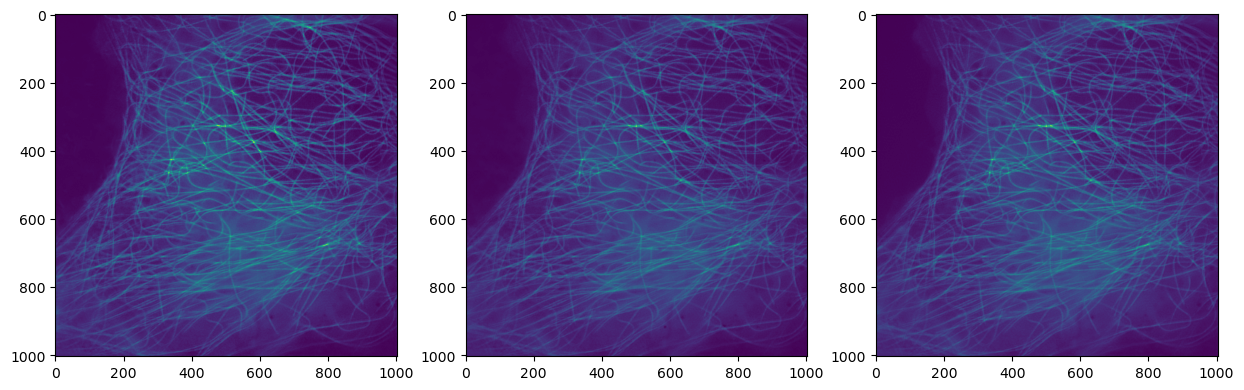

In [26]:
import matplotlib.pyplot as plt 
img0 = load_tiff('/group/jug/ashesh/indisplit_segmentation/BioSR/GT/Ch0/Ch0.tiff')[0]
img1 = load_tiff(f'/group/jug/ashesh/indisplit_segmentation/BioSR/deepLC/{str(mixing_t)}/Ch0/Ch0.tiff')[0]
img2 = load_tiff(f'/group/jug/ashesh/indisplit_segmentation/BioSR/indiSplit/{str(mixing_t)}/Ch0/Ch0.tiff')[0]
_, ax = plt.subplots(figsize=(15,5),ncols=3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img0)